# Challenge2
It might seem to be intuitive that bikeshare users would travel in the reverse direction in the evening than in
the morning. But how true is that? If that's the case, would it reduce the value of convenience of bikeshares being available everywhere, and should they just get their own bikes? Do we also need a crew to pick up and restore all the bikes to initial distributions across the city before the next morning?
    <br>a) Find out what percentage of bikes are returned to its initial location?
    <br>b) How many bikeshare trips usually visit more than just start/end points, but visited some other points before
the end of the day?

#### Library yang Dipakai

In [24]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

#### Load Data CSV ke Data Frame 
Mengubah Tipe Data Features trip_start_time dan trip_stop_time Menjadi Datetime

In [25]:
df_bikeshare = pd.read_csv("Documents/Toronto Bikeshare Data/bikeshare2018/Bike Share Toronto Ridership_Q1 2018.csv", parse_dates=["trip_start_time","trip_stop_time"])
df_bikeshare.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,2383648,393,7018,2018-01-01 00:47:00,Bremner Blvd / Rees St,2018-01-01 00:54:00,7176,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,2018-01-01 00:52:00,Ossington Ave / College St,2018-01-01 01:03:00,7191,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,2018-01-01 00:55:00,Bay St / College St (West Side) - SMART,2018-01-01 00:59:00,7021,Bay St / Albert St,Annual Member
3,2383651,1138,7202,2018-01-01 00:57:00,Queen St W / York St (City Hall),2018-01-01 01:16:00,7020,Phoebe St / Spadina Ave,Annual Member
4,2383652,703,7004,2018-01-01 01:00:00,University Ave / Elm St,2018-01-01 01:12:00,7060,Princess St / Adelaide St E,Annual Member


In [26]:
df_bikeshare.dtypes

trip_id                           int64
trip_duration_seconds             int64
from_station_id                   int64
trip_start_time          datetime64[ns]
from_station_name                object
trip_stop_time           datetime64[ns]
to_station_id                     int64
to_station_name                  object
user_type                        object
dtype: object

#### Menambahkan Features start_time_hour, start_time_minute, stop_time_hour dan stop_time_minute ke DataFrame
start_time_hour = ambil data jam pada trip_start_time
<br>start_time_minute = ambil data menit pada trip_start_time
<br>stop_time_hour = ambil data jam pada trip_stop_time
<br>stop_time_minute = ambil data menit pada trip_stop_time

In [27]:
df_bikeshare["start_time_hour"] = df_bikeshare.trip_start_time.dt.strftime("%H")
df_bikeshare["start_time_minute"] = df_bikeshare.trip_start_time.dt.strftime("%M")
df_bikeshare["stop_time_hour"] = df_bikeshare.trip_stop_time.dt.strftime("%H")
df_bikeshare["stop_time_minute"] = df_bikeshare.trip_stop_time.dt.strftime("%M")
df_bikeshare.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,start_time_hour,start_time_minute,stop_time_hour,stop_time_minute
0,2383648,393,7018,2018-01-01 00:47:00,Bremner Blvd / Rees St,2018-01-01 00:54:00,7176,Bathurst St / Fort York Blvd,Annual Member,00,47,00,54
1,2383649,625,7184,2018-01-01 00:52:00,Ossington Ave / College St,2018-01-01 01:03:00,7191,Central Tech (Harbord St),Annual Member,00,52,01,03
2,2383650,233,7235,2018-01-01 00:55:00,Bay St / College St (West Side) - SMART,2018-01-01 00:59:00,7021,Bay St / Albert St,Annual Member,00,55,00,59
3,2383651,1138,7202,2018-01-01 00:57:00,Queen St W / York St (City Hall),2018-01-01 01:16:00,7020,Phoebe St / Spadina Ave,Annual Member,00,57,01,16
4,2383652,703,7004,2018-01-01 01:00:00,University Ave / Elm St,2018-01-01 01:12:00,7060,Princess St / Adelaide St E,Annual Member,01,00,01,12


#### Mengurutkan Ulang Atribut pada DataFrame

In [28]:
df_bikeshare = df_bikeshare[["trip_id","trip_duration_seconds","from_station_id","trip_start_time","start_time_hour","start_time_minute","from_station_name","to_station_id","trip_stop_time","stop_time_hour","stop_time_minute","to_station_name","user_type"]]
df_bikeshare.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,start_time_hour,start_time_minute,from_station_name,to_station_id,trip_stop_time,stop_time_hour,stop_time_minute,to_station_name,user_type
0,2383648,393,7018,2018-01-01 00:47:00,00,47,Bremner Blvd / Rees St,7176,2018-01-01 00:54:00,00,54,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,2018-01-01 00:52:00,00,52,Ossington Ave / College St,7191,2018-01-01 01:03:00,01,03,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,2018-01-01 00:55:00,00,55,Bay St / College St (West Side) - SMART,7021,2018-01-01 00:59:00,00,59,Bay St / Albert St,Annual Member
3,2383651,1138,7202,2018-01-01 00:57:00,00,57,Queen St W / York St (City Hall),7020,2018-01-01 01:16:00,01,16,Phoebe St / Spadina Ave,Annual Member
4,2383652,703,7004,2018-01-01 01:00:00,01,00,University Ave / Elm St,7060,2018-01-01 01:12:00,01,12,Princess St / Adelaide St E,Annual Member


In [29]:
df_bikeshare.dtypes

trip_id                           int64
trip_duration_seconds             int64
from_station_id                   int64
trip_start_time          datetime64[ns]
start_time_hour                  object
start_time_minute                object
from_station_name                object
to_station_id                     int64
trip_stop_time           datetime64[ns]
stop_time_hour                   object
stop_time_minute                 object
to_station_name                  object
user_type                        object
dtype: object

#### Mengubah Tipe Data start_time_hour, start_time_minute, stop_time_hour dan stop_time_minute Menjadi Integer

In [30]:
df_bikeshare["start_time_hour"] = df_bikeshare["start_time_hour"].astype('int')
df_bikeshare["start_time_minute"] = df_bikeshare["start_time_minute"].astype('int')
df_bikeshare["stop_time_hour"] = df_bikeshare["stop_time_hour"].astype('int')
df_bikeshare["stop_time_minute"] = df_bikeshare["stop_time_minute"].astype('int')

In [31]:
df_bikeshare.dtypes

trip_id                           int64
trip_duration_seconds             int64
from_station_id                   int64
trip_start_time          datetime64[ns]
start_time_hour                   int32
start_time_minute                 int32
from_station_name                object
to_station_id                     int64
trip_stop_time           datetime64[ns]
stop_time_hour                    int32
stop_time_minute                  int32
to_station_name                  object
user_type                        object
dtype: object

#### Mengubah Tipe Data user_type Menjadi Category (0 atau 1) dan Mengubah Lagi ke Tipe Data Integer

In [32]:
df_bikeshare['user_type'] = df_bikeshare['user_type'].astype('category')
df_bikeshare['user_type'] = df_bikeshare['user_type'].cat.codes
df_bikeshare.dtypes

trip_id                           int64
trip_duration_seconds             int64
from_station_id                   int64
trip_start_time          datetime64[ns]
start_time_hour                   int32
start_time_minute                 int32
from_station_name                object
to_station_id                     int64
trip_stop_time           datetime64[ns]
stop_time_hour                    int32
stop_time_minute                  int32
to_station_name                  object
user_type                          int8
dtype: object

#### Cek Apakah Ada Features Yang Tidak Ada Nilainya

In [33]:
df_bikeshare.isnull().values.any()

False

In [34]:
df_bikeshare.shape

(178559, 13)

In [35]:
df_bikeshare.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,start_time_hour,start_time_minute,from_station_name,to_station_id,trip_stop_time,stop_time_hour,stop_time_minute,to_station_name,user_type
0,2383648,393,7018,2018-01-01 00:47:00,0,47,Bremner Blvd / Rees St,7176,2018-01-01 00:54:00,0,54,Bathurst St / Fort York Blvd,0
1,2383649,625,7184,2018-01-01 00:52:00,0,52,Ossington Ave / College St,7191,2018-01-01 01:03:00,1,3,Central Tech (Harbord St),0
2,2383650,233,7235,2018-01-01 00:55:00,0,55,Bay St / College St (West Side) - SMART,7021,2018-01-01 00:59:00,0,59,Bay St / Albert St,0
3,2383651,1138,7202,2018-01-01 00:57:00,0,57,Queen St W / York St (City Hall),7020,2018-01-01 01:16:00,1,16,Phoebe St / Spadina Ave,0
4,2383652,703,7004,2018-01-01 01:00:00,1,0,University Ave / Elm St,7060,2018-01-01 01:12:00,1,12,Princess St / Adelaide St E,0


In [36]:
df_bikeshare['user_type'].value_counts()

0    168309
1     10250
Name: user_type, dtype: int64

#### Membuat Variabel X (Independent Variabel/Predictor) yang nilainya berisi data dari
'trip_duration_seconds','from_station_id','start_time_hour','start_time_minute','to_station_id','stop_time_hour','stop_time_minute'
<br> 
<br> 
Mengambil Sampel Dari Data X untuk Review Yang dimulai dari baris/index ke 15 sampe ke 20

In [64]:
X = df_bikeshare[['trip_duration_seconds','from_station_id','start_time_hour','start_time_minute','to_station_id','stop_time_hour','stop_time_minute']].values
X[15:20]

array([[ 797, 7160,    2,   25, 7136,    2,   38],
       [ 352, 7140,    2,   29, 7003,    2,   35],
       [ 382, 7149,    2,   30, 7153,    2,   36],
       [ 433, 7111,    2,   45, 7176,    2,   52],
       [ 589, 7067,    2,   53, 7259,    3,    3]], dtype=int64)

#### Membuat Variabel y (Dependent Variabel/Target) yang nilainya berisi data dari
'user_type'
<br> 
<br> 
Mengambil Sampel Dari Data y untuk Review Yang dimulai dari baris/index ke 15 sampe ke 20

In [65]:
y = df_bikeshare['user_type'].values
y[15:20]

array([1, 0, 0, 0, 0], dtype=int8)

#### Melakukan Normalisasi Data Dengan Z-Scrore Pada Variabel X dan Mengubah Tipe Data X Menjadi Float
<br> 
Mengambil Sampel Dari Data X untuk Review Yang dimulai dari baris/index ke 0 sampe ke 5

In [66]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.33, -1.05, -2.86,  1.  ,  0.76, -2.87,  1.39],
       [-0.08,  0.82, -2.86,  1.29,  0.93, -2.67, -1.52],
       [-0.51,  1.39, -2.86,  1.46, -1.  , -2.87,  1.67],
       [ 0.49,  1.02, -2.86,  1.58, -1.01, -2.67, -0.78],
       [ 0.01, -1.21, -2.65, -1.7 , -0.56, -2.67, -1.  ]])

#### Mensplit Data Menjadi Data Trainning (sebanyak 90%) dan Data Test (sebanyak 10%) 

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160703, 7) (160703,)
Test set: (17856, 7) (17856,)


# Classification 

## 1. K nearest neighbor (K-NN)

In [68]:
from sklearn.neighbors import KNeighborsClassifier

#### Membuat Model KNN Menggunakan Data Trainning Dengan Bantuan Libary sklearn dimana k Pada KNN adalah 16 Neighbors

In [69]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [70]:
data_test = pd.DataFrame(X_test,columns=['trip_duration_seconds','from_station_id','start_time_hour','start_time_minute','to_station_id','stop_time_hour','stop_time_minute'])
data_test.head(20)

,trip_duration_seconds,from_station_id,start_time_hour,start_time_minute,to_station_id,stop_time_hour,stop_time_minute
0,-0.301206,1.933017,-0.988708,-0.494370,-0.091613,-1.012941,-0.092151
1,0.464318,1.629223,-0.365439,0.770756,0.282541,-0.185968,-1.629062
2,1.180276,-0.744867,-0.157682,1.460825,-0.102951,0.020775,-0.262919
3,-0.128275,-1.003654,0.465587,1.000779,-0.749217,0.434262,1.558605
4,0.114049,0.099004,-0.988708,0.885768,0.101133,-1.012941,1.615528
5,0.831109,-0.531087,0.881100,-0.436864,-0.193655,0.847748,0.932457
6,-0.018127,-0.857383,1.504369,-0.954416,-1.044004,1.467978,-0.262919
7,0.047961,-0.924893,0.050074,-0.494370,1.813169,0.020775,0.192462
8,0.118455,0.909120,-1.196464,-1.011922,-0.907949,-1.219685,-0.205996
9,0.303503,0.582823,-0.157682,-0.551876,-0.783231,-0.185968,0.363230


### Predicting
we can use the model to predict the test set:

##### Memasukan Historical Data Yang Ingin Diprediksi (Dimensi Data Harus Sama Dengan Variabel X)

In [71]:
yhat = neigh.predict(X_test)
yhat[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

In [72]:
data_test["user_type"] = yhat
data_test.head()

,trip_duration_seconds,from_station_id,start_time_hour,start_time_minute,to_station_id,stop_time_hour,stop_time_minute,user_type
0,-0.301206,1.933017,-0.988708,-0.494370,-0.091613,-1.012941,-0.092151,0
1,0.464318,1.629223,-0.365439,0.770756,0.282541,-0.185968,-1.629062,0
2,1.180276,-0.744867,-0.157682,1.460825,-0.102951,0.020775,-0.262919,0
3,-0.128275,-1.003654,0.465587,1.000779,-0.749217,0.434262,1.558605,0
4,0.114049,0.099004,-0.988708,0.885768,0.101133,-1.012941,1.615528,0


### Model Evaluation
we can use the Jaccard Score to evaluate the model:

In [45]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9591357970915291
Test set Accuracy:  0.9525089605734767


##### Hasil Masing-masing Accuracy Dalam Array Saat K Bernilai 1 Sampai 18

In [46]:
Ks = 18
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.94209229, 0.95172491, 0.94679659, 0.95250896, 0.9515569 ,
       0.95222894, 0.9515569 , 0.95228495, 0.95234095, 0.95189292,
       0.95178091, 0.95178091, 0.95178091, 0.95217294, 0.95234095,
       0.95194892, 0.95211694])

##### Plotting Hasil Accuracy K dari 1 sampai 16

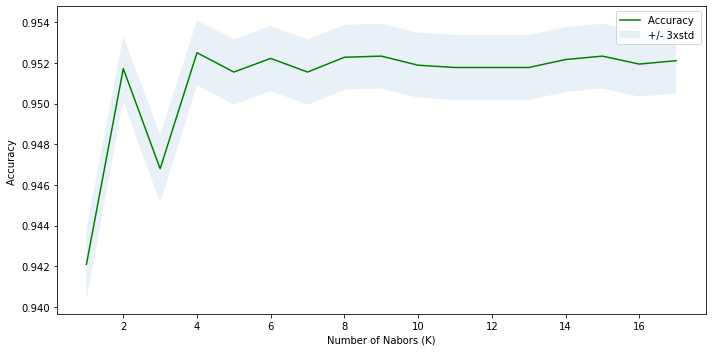

In [47]:
plt.figure(figsize=(10,5))
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [48]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9525089605734767 with k= 4


## 2. Support Vector Machine (SVM)

In [49]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [50]:
df_bikeshare.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,start_time_hour,start_time_minute,from_station_name,to_station_id,trip_stop_time,stop_time_hour,stop_time_minute,to_station_name,user_type
0,2383648,393,7018,2018-01-01 00:47:00,0,47,Bremner Blvd / Rees St,7176,2018-01-01 00:54:00,0,54,Bathurst St / Fort York Blvd,0
1,2383649,625,7184,2018-01-01 00:52:00,0,52,Ossington Ave / College St,7191,2018-01-01 01:03:00,1,3,Central Tech (Harbord St),0
2,2383650,233,7235,2018-01-01 00:55:00,0,55,Bay St / College St (West Side) - SMART,7021,2018-01-01 00:59:00,0,59,Bay St / Albert St,0
3,2383651,1138,7202,2018-01-01 00:57:00,0,57,Queen St W / York St (City Hall),7020,2018-01-01 01:16:00,1,16,Phoebe St / Spadina Ave,0
4,2383652,703,7004,2018-01-01 01:00:00,1,0,University Ave / Elm St,7060,2018-01-01 01:12:00,1,12,Princess St / Adelaide St E,0


##### Plotting Penyebaran Data from_station_id dan start_time_hour Berdasarkan Label user_type

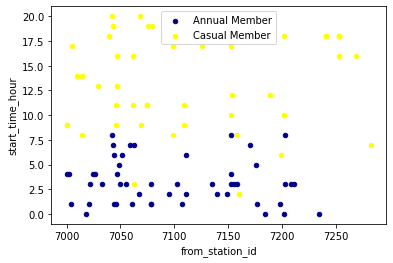

In [51]:
ax = df_bikeshare[df_bikeshare['user_type'] == 0][0:50].plot(kind='scatter', x='from_station_id', y='start_time_hour', color='DarkBlue', label='Annual Member');
df_bikeshare[df_bikeshare['user_type'] == 1][0:50].plot(kind='scatter', x='from_station_id', y='start_time_hour', color='Yellow', label='Casual Member', ax=ax);
plt.show()

In [73]:
df_bikeshare.dtypes

trip_id                           int64
trip_duration_seconds             int64
from_station_id                   int64
trip_start_time          datetime64[ns]
start_time_hour                   int32
start_time_minute                 int32
from_station_name                object
to_station_id                     int64
trip_stop_time           datetime64[ns]
stop_time_hour                    int32
stop_time_minute                  int32
to_station_name                  object
user_type                          int8
dtype: object

#### Membuat Variabel X (Independent Variabel/Predictor) yang nilainya berisi data dari DataFrame feature_df diantaranya
'trip_duration_seconds','from_station_id','start_time_hour','start_time_minute','to_station_id','stop_time_hour','stop_time_minute'
<br> 
<br> 
Mengambil Sampel Dari Data X untuk Review Yang dimulai dari baris/index ke 15 sampe ke 20

In [74]:
feature_df = df_bikeshare[['trip_duration_seconds','from_station_id','start_time_hour','start_time_minute','to_station_id','stop_time_hour','stop_time_minute']].values
X = np.asarray(feature_df)
X[15:20]

array([[ 797, 7160,    2,   25, 7136,    2,   38],
       [ 352, 7140,    2,   29, 7003,    2,   35],
       [ 382, 7149,    2,   30, 7153,    2,   36],
       [ 433, 7111,    2,   45, 7176,    2,   52],
       [ 589, 7067,    2,   53, 7259,    3,    3]], dtype=int64)

#### Membuat Variabel y (Dependent Variabel/Target) yang nilainya berisi data dari
'user_type'
<br> 
<br> 
Mengambil Sampel Dari Data y untuk Review Yang dimulai dari baris/index ke 15 sampe ke 20

In [75]:
y = np.asarray(df_bikeshare['user_type'])
y [15:20]

array([1, 0, 0, 0, 0], dtype=int8)

#### Mensplit Data Menjadi Data Trainning (sebanyak 80%) dan Data Test (sebanyak 20%) 

In [76]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (142847, 7) (142847,)
Test set: (35712, 7) (35712,)


### Predicting
we can use the model to predict the test set:

#### Membuat Model SVM Menggunakan Data Trainning Dengan Bantuan sklearn dimana Garis/Separator (pemisah data) yang dipakai adalah
##### RBF (Radian Basis Function)

In [56]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [77]:
data_test = pd.DataFrame(X_test,columns=['trip_duration_seconds','from_station_id','start_time_hour','start_time_minute','to_station_id','stop_time_hour','stop_time_minute'])
data_test.head(20)

,trip_duration_seconds,from_station_id,start_time_hour,start_time_minute,to_station_id,stop_time_hour,stop_time_minute
0,460,7037,16,18,7022,16,25
1,1178,7148,11,32,7259,11,52
2,463,7006,19,38,7031,19,46
3,952,7285,16,37,7176,16,53
4,850,7069,22,17,7206,22,31
5,435,7271,8,6,7004,8,13
6,272,7108,15,34,7099,15,39
7,853,7046,7,46,7047,8,0
8,775,7055,22,38,7069,22,50
9,481,7117,8,1,7044,8,9


##### Memasukan Historical Data Yang Ingin Diprediksi (Dimensi Data Harus Sama Dengan Variabel X)

In [78]:
yhat = clf.predict(X_test)
yhat [0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

In [79]:
data_test["user_type"] = yhat
data_test.head()

,trip_duration_seconds,from_station_id,start_time_hour,start_time_minute,to_station_id,stop_time_hour,stop_time_minute,user_type
0,460,7037,16,18,7022,16,25,0
1,1178,7148,11,32,7259,11,52,0
2,463,7006,19,38,7031,19,46,0
3,952,7285,16,37,7176,16,53,0
4,850,7069,22,17,7206,22,31,0


### Plotting Perbandingan Confussion Matrix antara Actual Value dan Predict Value

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     33653
           1       0.85      0.10      0.17      2059

    accuracy                           0.95     35712
   macro avg       0.90      0.55      0.57     35712
weighted avg       0.94      0.95      0.93     35712

Confusion matrix, without normalization
[[33617    36]
 [ 1861   198]]


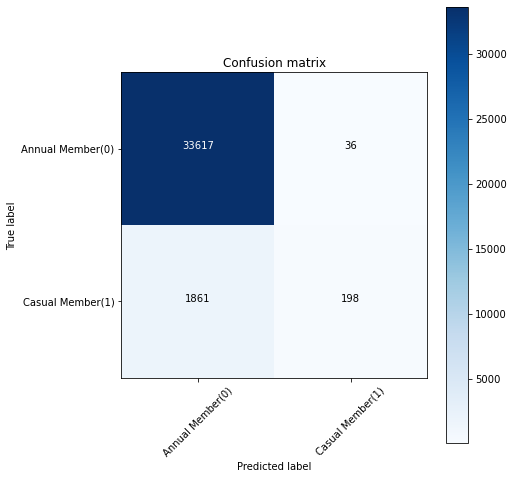

In [61]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=['Annual Member(0)','Casual Member(1)'],normalize= False,  title='Confusion matrix')

### Model Evaluation
we can use the F1 Score and Jaccard Score to evaluate the model:

##### Evaluasi Model dengan F1 Score

In [62]:
from sklearn.metrics import f1_score
print("F1 Score Evaluation")
print("Train set Accuracy: ", f1_score(y_train, clf.predict(X_train), average='weighted'))
print("Test set Accuracy: ", f1_score(y_test, yhat, average='weighted') )

F1 Score Evaluation
Train set Accuracy:  0.9272588594757558
Test set Accuracy:  0.9264428738515774


 ##### Evaluasi Model dengan Jaccard Score

In [63]:
from sklearn import metrics
print("Jaccard Score Evaluation")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Jaccard Score Evaluation
Train set Accuracy:  0.9474612697501522
Test set Accuracy:  0.9468806003584229
